# Detector Masking

Experimenting with how the masking limits look

In [1]:
from utilities import masking
from spectrum_overload.Spectrum import Spectrum
from astropy.io import fits
import matplotlib.pyplot as plt
import os
%matplotlib inline

masks [[2112.553, 2123.4988]]


/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


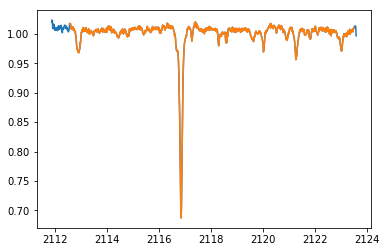

masks [[2127.23, 2136.8758]]


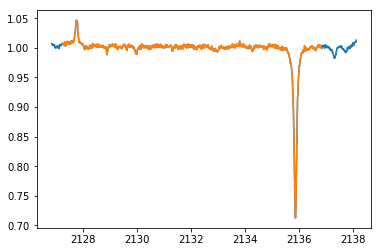

masks [[2142.209, 2151.7548]]


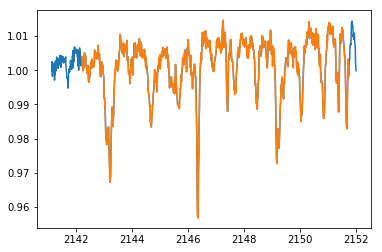

masks [[2155.251, 2163.7444]]


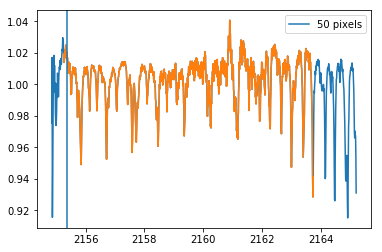

masks [[2112.54455, 2123.49899]]


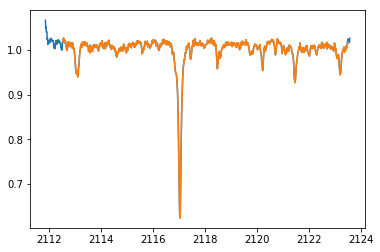

masks [[2127.231, 2137.4053]]


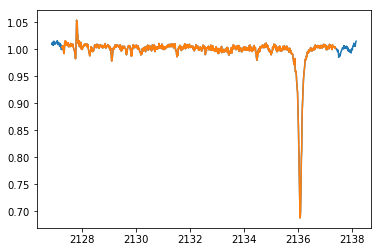

masks [[2141.94682, 2151.7596]]


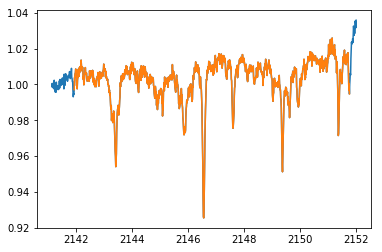

masks [[2155.251, 2164.9609]]


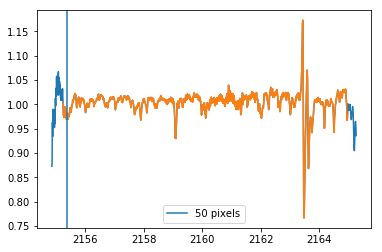

masks [[2112.5441, 2123.499]]


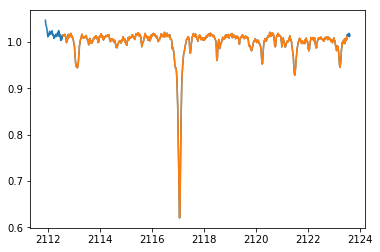

masks [[2127.7713, 2137.427]]


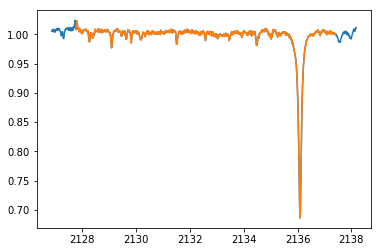

masks [[2141.9467, 2151.7604]]


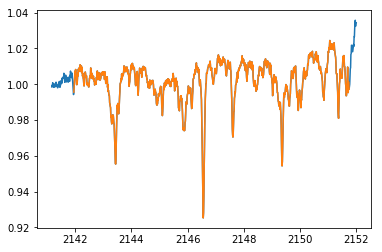

masks [[2155.251, 2163.5924]]


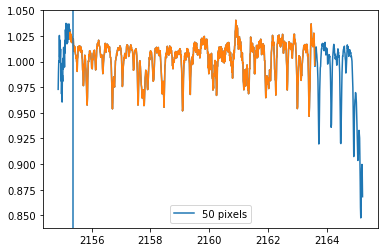

masks [[2112.5459, 2123.4989]]


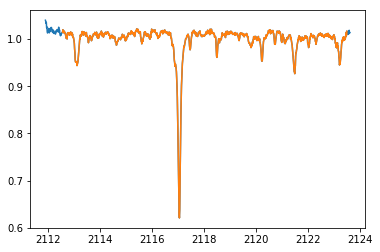

masks [[2127.2308, 2137.4039]]


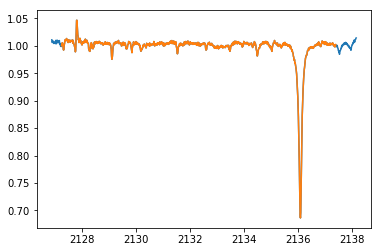

masks [[2141.9468, 2151.3669]]


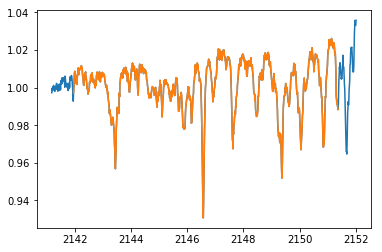

masks [[2155.5105, 2164.6702]]


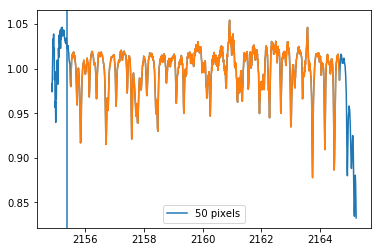

masks [[2112.5531, 2123.4988]]


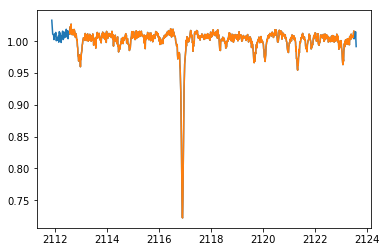

masks [[2127.2302, 2137.231]]


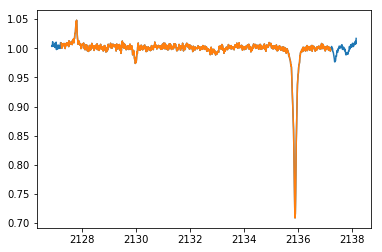

masks [[2142.296, 2151.4593]]


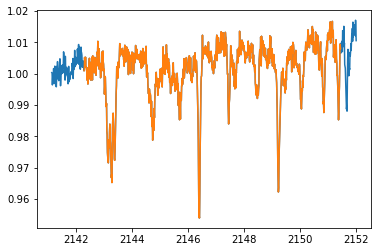

masks [[2154.924, 2164.6709]]


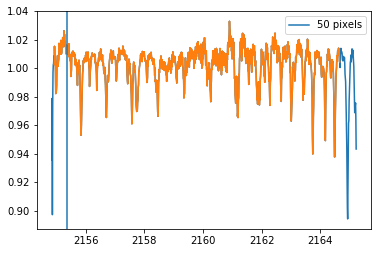

masks [[2112.5489, 2123.4989]]


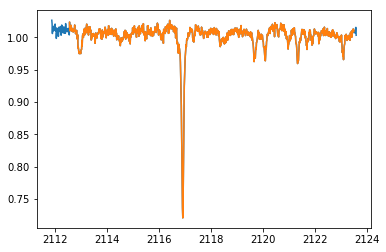

masks [[2127.2304, 2137.2402]]


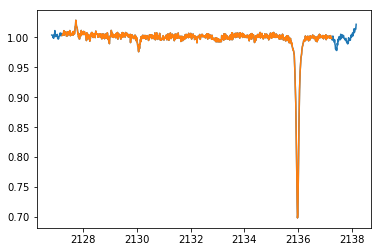

masks [[2142.9098, 2151.9408]]


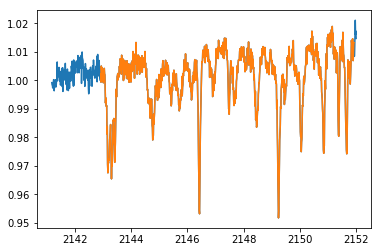

masks [[2155.251, 2163.5983]]


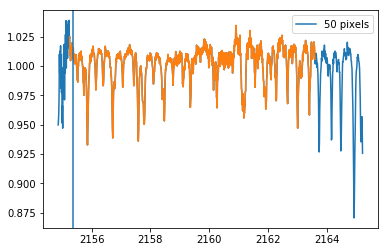

In [2]:
observations = [{"star": "HD4747", "obsnum": "1", "chip": "1"},
                {"star": "HD4747", "obsnum": "1", "chip": "2"},
                {"star": "HD4747", "obsnum": "1", "chip": "3"},
                {"star": "HD4747", "obsnum": "1", "chip": "4"},
                {"star": "HD30501", "obsnum": "2a", "chip": "1"},
                {"star": "HD30501", "obsnum": "2a", "chip": "2"},
                {"star": "HD30501", "obsnum": "2a", "chip": "3"},
                {"star": "HD30501", "obsnum": "2a", "chip": "4"},
                {"star": "HD30501", "obsnum": "2b", "chip": "1"},
                {"star": "HD30501", "obsnum": "2b", "chip": "2"},
                {"star": "HD30501", "obsnum": "2b", "chip": "3"},
                {"star": "HD30501", "obsnum": "2b", "chip": "4"},
                {"star": "HD30501", "obsnum": "3", "chip": "1"},
                {"star": "HD30501", "obsnum": "3", "chip": "2"},
                {"star": "HD30501", "obsnum": "3", "chip": "3"},
                {"star": "HD30501", "obsnum": "3", "chip": "4"},
                {"star": "HD211847", "obsnum": "1", "chip": "1"},
                {"star": "HD211847", "obsnum": "1", "chip": "2"},
                {"star": "HD211847", "obsnum": "1", "chip": "3"},
                {"star": "HD211847", "obsnum": "1", "chip": "4"},
                {"star": "HD211847", "obsnum": "2", "chip": "1"},
                {"star": "HD211847", "obsnum": "2", "chip": "2"},
                {"star": "HD211847", "obsnum": "2", "chip": "3"},
                {"star": "HD211847", "obsnum": "2", "chip": "4"},]

for obs in observations:
    # Load in masking data
    masks = masking.get_maskinfo(obs["star"], obs["obsnum"], obs["chip"])
    print("masks", masks)
    
    # Load in a spectrum
    name = "{0}-{1}-mixavg-tellcorr_{2}.fits".format(obs["star"], obs["obsnum"], obs["chip"])
    data, hdr = fits.getdata(os.path.join("/home/jneal/.handy_spectra/", name), header=True)
    spec = Spectrum(xaxis=data["wavelength"], flux=data["flux"], header=hdr) 
    
    spec2 = spec.copy()
    
    for mask_limits in masks:
            if len(mask_limits) is not 2:
                raise ValueError("Mask limits in mask file is incorrect for {0}-{1}_{2}".format(obs["star"], obs["obsnum"], obs["chip"]))
            spec2.wav_select(*mask_limits)  # Wavelengths to include
    
    
    
    plt.plot(spec.xaxis, spec.flux)
    plt.plot(spec2.xaxis, spec2.flux)
    if obs["chip"] == "4":
        plt.axvline(x=spec.xaxis[50], label="50 pixels")
    plt.legend()
    plt.show()
    
    

In [3]:
obser_4 = [{"star": "HD4747", "obsnum": "1", "chip": "4"},
                {"star": "HD30501", "obsnum": "2a", "chip": "4"},
                {"star": "HD30501", "obsnum": "2b", "chip": "4"},
                {"star": "HD30501", "obsnum": "3", "chip": "4"},
                {"star": "HD211847", "obsnum": "1", "chip": "4"},
                {"star": "HD211847", "obsnum": "2", "chip": "4"},]

masks [[2155.251, 2163.7444]]
masks [[2155.251, 2164.9609]]
masks [[2155.251, 2163.5924]]
masks [[2155.5105, 2164.6702]]
masks [[2154.924, 2164.6709]]
masks [[2155.251, 2163.5983]]


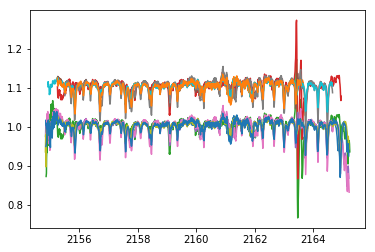

In [4]:
for obs in obser_4:
    masks = masking.get_maskinfo(obs["star"], obs["obsnum"], obs["chip"])
    print("masks", masks)
    
    # Load in a spectrum
    name = "{0}-{1}-mixavg-tellcorr_{2}.fits".format(obs["star"], obs["obsnum"], obs["chip"])
    data, hdr = fits.getdata(os.path.join("/home/jneal/.handy_spectra/", name), header=True)
    spec = Spectrum(xaxis=data["wavelength"], flux=data["flux"], header=hdr) 
    
    spec2 = spec.copy()
    
    for mask_limits in masks:
            if len(mask_limits) is not 2:
                raise ValueError("Mask limits in mask file is incorrect for {0}-{1}_{2}".format(obs["star"], obs["obsnum"], obs["chip"]))
            spec2.wav_select(*mask_limits)  # Wavelengths to include
    
    plt.plot(spec.xaxis, spec.flux)
    plt.plot(spec2.xaxis, spec2.flux+0.1, label="spec2")
   
plt.show()

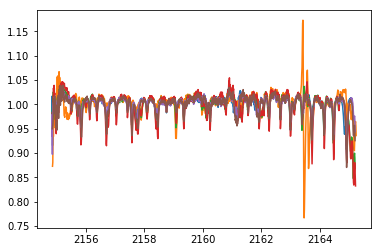

In [5]:
for obs in obser_4:
    name = "{0}-{1}-mixavg-tellcorr_{2}.fits".format(obs["star"], obs["obsnum"], obs["chip"])
    data, hdr = fits.getdata(os.path.join("/home/jneal/.handy_spectra/", name), header=True)
    spec = Spectrum(xaxis=data["wavelength"], flux=data["flux"], header=hdr) 
    
    
    plt.plot(spec.xaxis, spec.flux)
plt.show()

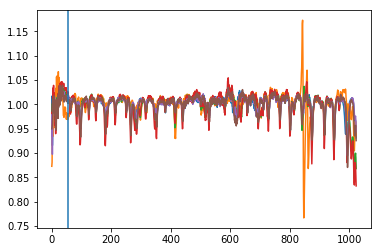

In [6]:
for obs in obser_4:
    name = "{0}-{1}-mixavg-tellcorr_{2}.fits".format(obs["star"], obs["obsnum"], obs["chip"])
    data, hdr = fits.getdata(os.path.join("/home/jneal/.handy_spectra/", name), header=True)
    spec = Spectrum(xaxis=data["wavelength"], flux=data["flux"], header=hdr) 
    
    
    plt.plot(spec.flux)
plt.axvline(x=55)
plt.show()